In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#import tensorflow as tf

from pylab import rcParams
from keras.models import Sequential
from keras.layers import Dense, Dropout

%matplotlib inline

RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

Using TensorFlow backend.


# Loading the data

The dataset we're going to use can be downloaded from [Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud). It contains data about credit card transactions that occurred during a period of two days, with 492 frauds out of 284,807 transactions.

All variables in the dataset are numerical. The data has been transformed using PCA transformation(s) due to privacy reasons. The two features that haven't been changed are Time and Amount. Time contains the seconds elapsed between each transaction and the first transaction in the dataset.

In [2]:
df = pd.read_csv("creditcard.csv")

# Exploration

In [3]:
df.shape

(284807, 31)

31 columns, 2 of which are Time and Amount. The rest are output from the PCA transformation. Let's check for missing values:

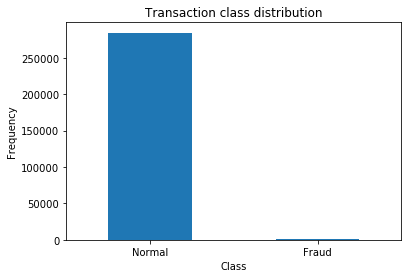

In [4]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

# Preparing the data

First, let's drop the Time column (not going to use it) and use the scikit's StandardScaler on the Amount. The scaler removes the mean and scales the values to unit variance:

In [5]:
from sklearn.preprocessing import StandardScaler

data = df.drop(['Time'], axis=1)

data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

Training our Autoencoder is gonna be a bit different from what we are used to. Let's say you have a dataset containing a lot of non fraudulent transactions at hand. You want to detect any anomaly on new transactions. We will create this situation by training our model on the normal transactions, only. Reserving the correct class on the test set will give us a way to evaluate the performance of our model. We will reserve 20% of our data for testing:

In [6]:
from sklearn.model_selection import train_test_split

data = np.array(data)

X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train[:,-1] == 0]
X_train = X_train[:,:-1]

y_test = X_test[:,-1]
X_test = X_test[:,:-1]

In [7]:
X_train.shape

(227451, 29)

# Building the model

Building an autoencoder with 100 hidden layer neurons.

In [8]:
input_dim = X_train.shape[1]
encoding_dim = 15

In [9]:
autoencoder = Sequential()

autoencoder.add(Dropout(0.2, input_shape=(input_dim,)))
autoencoder.add(Dense(20, activation='sigmoid'))
autoencoder.add(Dense(encoding_dim, activation='relu'))
autoencoder.add(Dense(20, activation='sigmoid'))
autoencoder.add(Dense(input_dim, activation='linear'))

Let's train our model for 100 epochs with a batch size of 32 samples and save the best performing model to a file.

In [10]:
nb_epoch = 100
batch_size = 32

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['mse'])

In [11]:
hist = []
for _ in range(100):
    hist.append(autoencoder.fit(X_train, X_train,
                    epochs=1,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1).history)
    

Train on 227451 samples, validate on 56962 samples
Epoch 1/1
227451/227451 [==============================] - 10s - loss: 0.6266 - mean_squared_error: 0.6266 - val_loss: 0.4506 - val_mean_squared_error: 0.4506
Train on 227451 samples, validate on 56962 samples
Epoch 1/1
227451/227451 [==============================] - 8s - loss: 0.4634 - mean_squared_error: 0.4634 - val_loss: 0.3698 - val_mean_squared_error: 0.3698
Train on 227451 samples, validate on 56962 samples
Epoch 1/1
227451/227451 [==============================] - 9s - loss: 0.4135 - mean_squared_error: 0.4135 - val_loss: 0.3312 - val_mean_squared_error: 0.3312
Train on 227451 samples, validate on 56962 samples
Epoch 1/1
227451/227451 [==============================] - 9s - loss: 0.3891 - mean_squared_error: 0.3891 - val_loss: 0.3133 - val_mean_squared_error: 0.3133
Train on 227451 samples, validate on 56962 samples
Epoch 1/1
227451/227451 [==============================] - 12s - loss: 0.3723 - mean_squared_error: 0.3723 - val

227451/227451 [==============================] - 9s - loss: 0.2893 - mean_squared_error: 0.2893 - val_loss: 0.2316 - val_mean_squared_error: 0.2316
Train on 227451 samples, validate on 56962 samples
Epoch 1/1
227451/227451 [==============================] - 11s - loss: 0.2917 - mean_squared_error: 0.2917 - val_loss: 0.2332 - val_mean_squared_error: 0.2332
Train on 227451 samples, validate on 56962 samples
Epoch 1/1
227451/227451 [==============================] - 14s - loss: 0.2891 - mean_squared_error: 0.2891 - val_loss: 0.2326 - val_mean_squared_error: 0.2326
Train on 227451 samples, validate on 56962 samples
Epoch 1/1
227451/227451 [==============================] - 11s - loss: 0.2891 - mean_squared_error: 0.2891 - val_loss: 0.2316 - val_mean_squared_error: 0.2316
Train on 227451 samples, validate on 56962 samples
Epoch 1/1
227451/227451 [==============================] - 10s - loss: 0.2880 - mean_squared_error: 0.2880 - val_loss: 0.2329 - val_mean_squared_error: 0.2329
Train on 227

227451/227451 [==============================] - 10s - loss: 0.2828 - mean_squared_error: 0.2828 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Train on 227451 samples, validate on 56962 samples
Epoch 1/1
227451/227451 [==============================] - 10s - loss: 0.2806 - mean_squared_error: 0.2806 - val_loss: 0.2307 - val_mean_squared_error: 0.2307
Train on 227451 samples, validate on 56962 samples
Epoch 1/1
227451/227451 [==============================] - 9s - loss: 0.2824 - mean_squared_error: 0.2824 - val_loss: 0.2304 - val_mean_squared_error: 0.2304
Train on 227451 samples, validate on 56962 samples
Epoch 1/1
227451/227451 [==============================] - 9s - loss: 0.2810 - mean_squared_error: 0.2810 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Train on 227451 samples, validate on 56962 samples
Epoch 1/1
227451/227451 [==============================] - 12s - loss: 0.2805 - mean_squared_error: 0.2805 - val_loss: 0.2296 - val_mean_squared_error: 0.2296
Train on 2274

In [ ]:
_hist_ = [(x['loss'][0], x['val_loss'][0]) for x in hist]

In [ ]:
# autoencoder.save('fraud_detection.h5')
from keras.models import load_model
aec = load_model('fraud_detection.h5')

# Evaluation

In [ ]:
plt.plot(list(zip(*_hist_))[0])
plt.plot(list(zip(*_hist_))[1])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

The reconstruction error on our training and test data seems to converge nicely. Is it low enough? Let's have a closer look at the error distribution:

In [ ]:
predictions = aec.predict(X_train)
recon  = (((predictions-X_train)**2).mean(-1))

test_pred = autoencoder.predict(X_test)
test_recon  = (((test_pred-X_test)**2).mean(-1))

mean_recon = recon.mean()

In [ ]:
from sklearn.metrics import precision_score,recall_score

prc = list()
rec = list()
thres = list()

th = 0
for i in range(100):
    th+=0.1
    fraud = (test_recon>mean_recon+th)
    prc.append(precision_score(y_test,fraud))
    rec.append(recall_score(y_test,fraud))
    thres.append(th)
    

In [ ]:
plt.plot(prc, rec)
plt.title('precision vs recall')
plt.ylabel('recall')
plt.xlabel('precision')

In [ ]:
plt.plot(thres, rec)
plt.title('threshold vs recall')
plt.ylabel('recall')
plt.xlabel('threshold')

In [ ]:
plt.plot(thres, prc)
plt.title('threshold vs precision')
plt.ylabel('precision')
plt.xlabel('threshold')